I would like to understand the relationship between dark photon decay length, boost, and lepton displacement. Larger bound state masses increase dark photon boost, which in turn increases dark photon decay length (increasing lepton displacement) and decreases the angular separation between daughter leptons (decreasing lepton displacement). It would be good to generate a quantitative understanding of the combined effect of these two factors. 

I expect such a study to be a useful input to ongoing studies of the efficiency and resolution with which lepton jets reconstruct dark photon decays as well as first step in the study of how best (or whether) to explicitly require that our signal region lepton jets are displaced.

In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

Start by plotting the relevant quantities with a single signal sample and no LJ selections applied

In [2]:
samples = [
    "2Mu2E_200GeV_1p2GeV_24mm",
]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=1,
)

channels = ["baseNoLj"]
p = sidm_processor.SidmProcessor(
    channels,
    ["base_plus_gen"]
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)
hists = output["out"][samples[0]]["hists"]

Output()

Output()

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Warning: a histogram with the following axis names could not be filled and will be skipped: ['channel', 'lj_pfiso',
'weight']

Take a look at gen-level dark photon lxy and pt

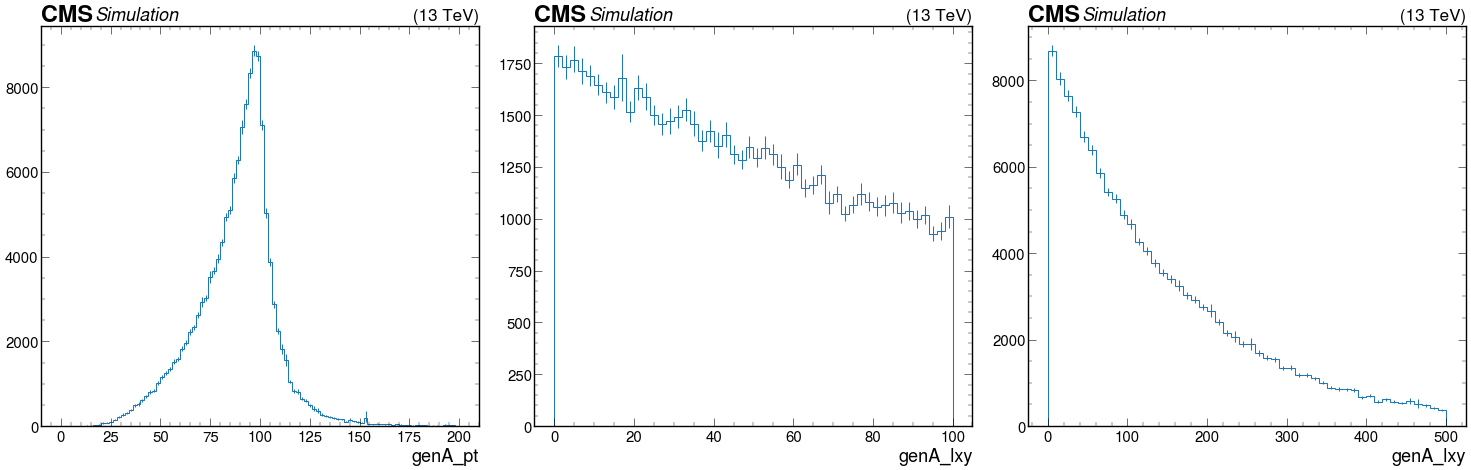

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(30, 10))
plt.subplot(1, 3, 1)
utilities.plot(hists["genA_pt"][channels[0], :])
plt.subplot(1, 3, 2)
utilities.plot(hists["genA_lxy"][channels[0], ::2j])
plt.subplot(1, 3, 3)
utilities.plot(hists["genA_lxy_highRange"][channels[0], ::2j])
plt.tight_layout()
plt.show()

Cool, all looks reasonable. Next look at correlation between dark photon pT and lxy with 2D hist and profiles.

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:48: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale


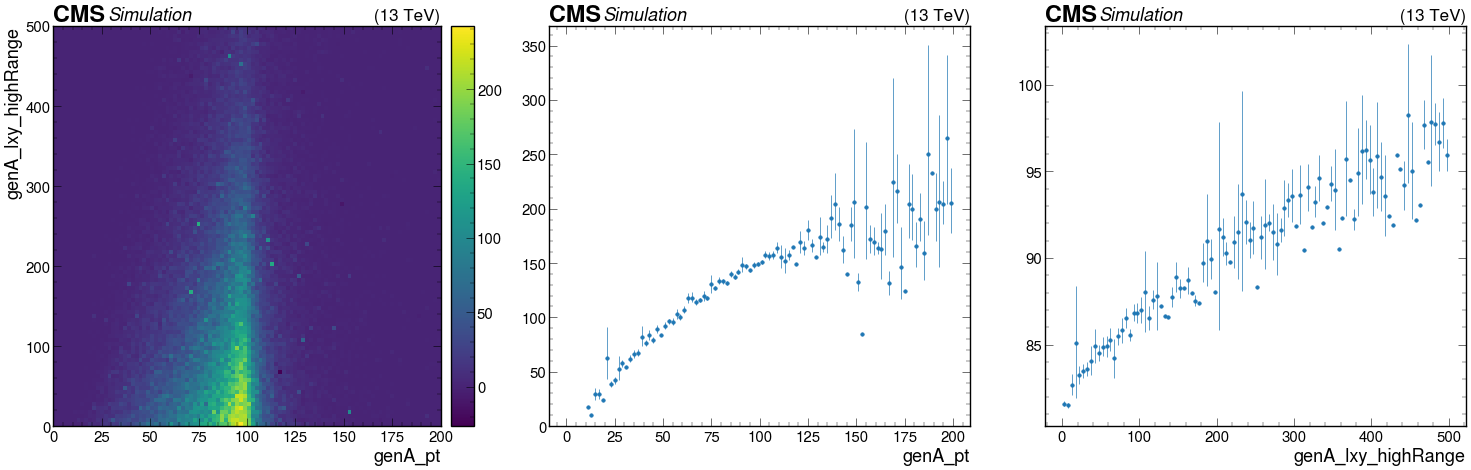

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(30, 10))
plt.subplot(1, 3, 1)
utilities.plot(hists["genA_pt_lxy_highRange"][channels[0], :, :])
plt.subplot(1, 3, 2)
utilities.plot(hists["genA_pt_lxy_highRange"][channels[0], :, :].profile("genA_lxy_highRange"), histtype='errorbar')
plt.subplot(1, 3, 3)
utilities.plot(hists["genA_pt_lxy_highRange"][channels[0], :, :].profile("genA_pt"), histtype='errorbar')
plt.tight_layout()
plt.show()

Nice, the expected positive correlation is totally obvious in the profiles. Look at lepton displacement next.